# Rakesh Kumar Rath

## **Task 1**

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### **Import Necessary Library**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Load The Dataset

In [4]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print('Data Loaded Successfully')

Data Loaded Successfully


In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No Missing Values

#### Let's Plot The Data

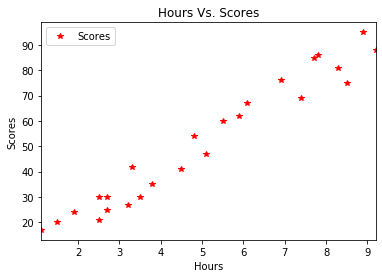

In [12]:
df.plot(x = 'Hours', y = 'Scores', style = 'r*')
plt.title('Hours Vs. Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

From the above plot we can see there is a positive linear relationship between Hours of Studying and Scores obtained

#### Check for Outliers

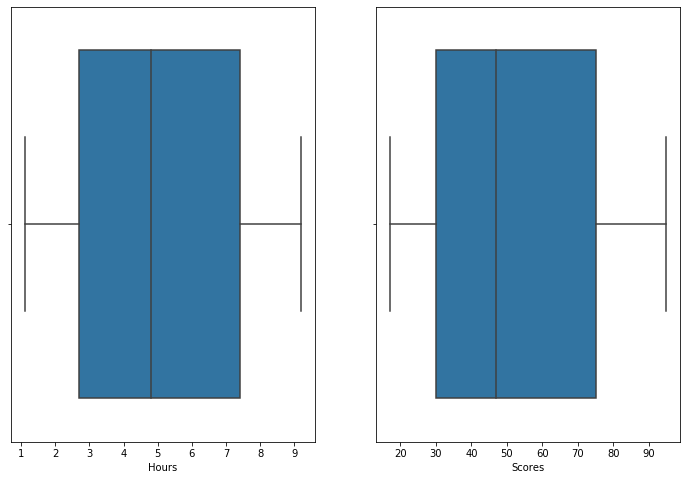

In [19]:
fig, axs = plt.subplots(1,2, figsize = (12,8))
sns.boxplot(df['Hours'], ax = axs[0])
sns.boxplot(df['Scores'], ax = axs[1])
plt.show()

No Outliers present in the dataset

#### Preparing The Data for Prediction Task

In [24]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Splitting The Data

We'll do this by using Scikit-Learn's built-in train_test_split() method.

In [32]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)                        

### Train the Algorithm

In [33]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


#### Regressor Coefficient and Intercept Term

In [36]:
print('Regression Coefficient is:', regressor.coef_)
print('Intercept term is:', regressor.intercept_)

Regression Coefficient is: [9.91065648]
Intercept term is: 2.018160041434683


#### Regression Line

In [37]:
line = regressor.intercept_ + regressor.coef_*X

#### Let's Fit The Line

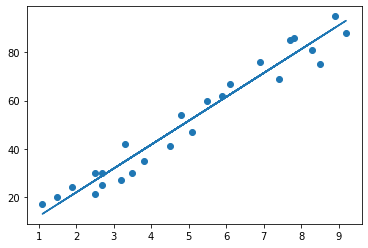

In [38]:
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### Predicting on Test Data

In [39]:
y_pred = regressor.predict(X_test)

#### Comaring Actual Vs. Predicted Scores

In [40]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Let's See On Test Data

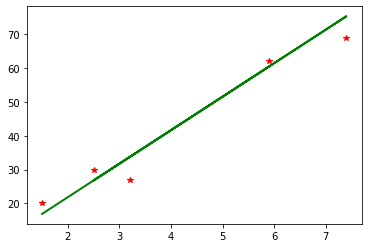

In [41]:
plt.plot(X_test, y_test, 'r*')
plt.plot(X_test, y_pred, color = 'green', linewidth = 2)
plt.show()

### Prediction on a New Data Point

In [45]:
hrs = np.array([[9.25]])
pred = regressor.predict(hrs)

In [46]:
pred

array([93.69173249])

In [48]:
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(pred))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


#### Evaluating The Model's performance

In [49]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 2.0454485813637495
